# Week 9 Wednesday

## Announcements

* Midterm 2 is Friday.  Get a notecard if you need one.
* Jinghao will go over the sample midterm (posted on the [Week 9](https://canvas.eee.uci.edu/courses/53164/pages/week-9) page) in discussion on Thursday.  Sample solutions will be posted after discussion section.
* Worksheet 17 is posted.  It is meant to get you started on the course project.
* Worksheet 18 is also posted.  I recommend finishing this worksheet before Midterm 2, as it is mostly review material.  Worksheet 18 is the last worksheet for Math 10.
* I have office hours starting at 12pm in here before the midterm on Friday.
* The specific new functions we introduce today will not be on Midterm 2, but the concepts are relevant.


In [1]:
import pandas as pd
import altair as alt

## Temperature data set

Here is the dataset we finished with on Friday.  We have succeeded in plotting the data, but we haven't done any Machine Learning with the data yet.

We would really like to use a line like `color="city"`, so that temperatures in different cities get different colors.  We can't do that with the current version of the DataFrame, because the city names are given in column names (as opposed to being given in their own column).

In [2]:
df_pre = pd.read_csv("temperature_f.csv", parse_dates=["datetime"])
df_pre.sample(4, random_state=0)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
37037,2016-12-22 18:00:00,38.7,31.7,52.9,34.9,55.3,60.9,45.6,60.8,34.1,...,46.8,43.6,32.0,36.4,44.3,58.4,57.5,55.4,55.4,58.7
23197,2015-05-26 02:00:00,61.6,60.6,56.2,60.3,65.7,64.0,75.3,78.4,60.3,...,75.0,73.2,62.5,66.9,58.2,59.7,71.4,69.9,69.9,65.1
33027,2016-07-08 16:00:00,59.9,62.0,59.3,59.9,70.9,70.5,90.6,95.2,79.6,...,87.7,83.8,69.4,66.5,87.3,87.4,104.4,97.0,79.0,87.4
22542,2015-04-28 19:00:00,50.6,55.1,57.0,56.8,79.2,82.3,74.1,78.5,51.3,...,63.6,63.6,58.7,50.8,75.0,70.7,74.1,70.7,66.9,70.6


Originally the city names appear as column headers.  For both Altair and scikit-learn, we want a column containing all these city names.

In [3]:
df_melted = df_pre.melt(
        id_vars="datetime",
        var_name="city", 
        value_name="temperature"
    )

By using the method `melt`, we have gotten a much longer version of the DataFrame, that now has just three columns.  The "city" column contains the old column headers (repeated many times each city), and the "temperature" column contains the old cell contents.

In [4]:
df_melted.sample(4, random_state=0)

,datetime,city,temperature
1478577,2016-03-25 22:00:00,Eilat,78.0
1299334,2016-06-07 11:00:00,Montreal,61.1
1072194,2016-05-01 19:00:00,Miami,84.5
863753,2013-03-15 18:00:00,Atlanta,48.5


The resulting DataFrame is much longer.

Here we check using an f-string.  We use triple quotation marks so that we are allowed to include a line break in the string.

In [5]:
print(f"""The original DataFrame had shape {df_pre.shape}. 
The new DataFrame has shape {df_melted.shape}.""")

The original DataFrame had shape (45252, 37). 
The new DataFrame has shape (1629072, 3).


Here is what we did on Friday, although I'm naming the final DataFrame `df3` instead of `df`, because I want to make more changes before calling the result `df`.

* Keep only the rows corresponding to the cities in the following `cities` list.
* Drop the rows with missing values.
* Sort the DataFrame by date.
* Name the resulting DataFrame `df3`.

In [6]:
cities = ["San Diego", "San Francisco", "Detroit"]

We keep only the rows corresponding to those three cities using Boolean indexing and the `isin` method.  We then drop the rows with missing values.  We then sort the values by date.  (Probably the sorting would not be correct if the dates were strings instead of datetime objects.)

In [7]:
df1 = df_melted[df_melted["city"].isin(cities)]
df2 = df1.dropna(axis=0)
df3 = df2.sort_values("datetime")

Here is how the resulting DataFrame `df3` looks.  Notice how the first three rows are all from the same row and at 1pm.  Then in the last row it moves to 2pm.  (It does seem like the DataFrame is sorted by date, and we are only seeing the three listed cities, unlike earlier when we saw many different cities.)

In [8]:
df3.head(4)

,datetime,city,temperature
90504,2012-10-01 13:00:00,San Francisco,61.4
226260,2012-10-01 13:00:00,San Diego,65.1
905040,2012-10-01 13:00:00,Detroit,51.6
905041,2012-10-01 14:00:00,Detroit,51.7


## Plotting the data

Now that we have "melted" the DataFrame, it is easy to plot using Altair.

Our goal is to predict these values using scikit-learn.  This will be our first time using a decision tree for regression (as opposed to classification).

In [44]:
c_true = alt.Chart(df3[6400:7000]).mark_line().encode(
    x="datetime",
    y="temperature",
    color="city",
    tooltip=["city", "temperature", "datetime"]
).properties(
    width=600
)

c_true

alt.Chart(...)

## Adding Boolean columns for the cities

Because the "city" column contains strings, we can't use it as an input when fitting a decision tree.  We will convert it to multiple Boolean indicator columns.

Here are two options:
* Use `pd.get_dummies`.
* Use scikit-learn's `OneHotEncoder` class.

I couldn't immediately get `OneHotEncoder` to work with `Pipeline` (according to ChatGPT, it seems to require yet another tool called `ColumnTransformer`), so I'm going to use the pandas option.

* Make a new DataFrame `df4` containing Boolean indicator columns for the "city" values using the pandas function `get_dummies`.

I couldn't remember the name of the keyword argument I wanted to use, so I called the following `help` function.  This reminded me that `columns` was the keyword argument I wanted to use.

In [11]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.reshape:

get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None) -> 'DataFrame'
    Convert categorical variable into dummy/indicator variables.
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a dictionary mapping column names to prefixes.
    prefix_sep : str, default '_'
        If appending prefix, separator/delimiter to use. Or pass a
        list or dictionary as with `prefix`.
    dummy_na : bool, default False
        Add a column to indicate NaNs, if False NaNs are ignored.
    columns : list-like, default None
        Colu

Here is a reminder of how the top of the data looks.

In [14]:
df3.head(4)

,datetime,city,temperature
90504,2012-10-01 13:00:00,San Francisco,61.4
226260,2012-10-01 13:00:00,San Diego,65.1
905040,2012-10-01 13:00:00,Detroit,51.6
905041,2012-10-01 14:00:00,Detroit,51.7


Here is the result of calling the `get_dummies` function for the "city" column.  This is a common procedure in Machine Learning.  We have a column with data we want to use as an input (in this case, we want to use the city), but we aren't able to because the data is not numeric.  Here we add a column for each city, indicating if the row corresponded to that particular city.  For example, notice that our DataFrame begins "not Detroit", "not Detroit", "Detroit", "Detroit".  This corresponds to the "city_Detroit" column beginning `[0, 0, 1, 1]`.  I think of this as being equivalent to `[False, False, True, True]`.

The main point is that we can use these three new columns as inputs to our Machine Learning algorithm.

In [12]:
pd.get_dummies(df3, columns=["city"])

,datetime,temperature,city_Detroit,city_San Diego,city_San Francisco
90504,2012-10-01 13:00:00,61.4,0,0,1
226260,2012-10-01 13:00:00,65.1,0,1,0
905040,2012-10-01 13:00:00,51.6,1,0,0
905041,2012-10-01 14:00:00,51.7,1,0,0
90505,2012-10-01 14:00:00,61.4,0,0,1
...,...,...,...,...,...
271509,2017-11-29 22:00:00,67.0,0,1,0
950290,2017-11-29 23:00:00,40.8,1,0,0
271510,2017-11-29 23:00:00,67.0,0,1,0
271511,2017-11-30 00:00:00,64.8,0,1,0


We are doing the same thing in the next cell, the only difference being that we save the result with the variable name `df4`.

In [15]:
df4 = pd.get_dummies(df3, columns=["city"])

* Make a list `city_cols` containing the three new column names we just added.

Here is how we can make that list using list comprehension.

In [16]:
city_cols = [c for c in df4.columns if c.startswith("city_")]
city_cols

['city_Detroit', 'city_San Diego', 'city_San Francisco']

The following alternative approach doesn't seem as robust, because we need to know there are three columns, and we need to know they're at the end of the DataFrame.  On the other hand, with the following approach, we don't need to know that the column names start with `"city_"`.

In [17]:
df4.columns[-3:]

Index(['city_Detroit', 'city_San Diego', 'city_San Francisco'], dtype='object')

* Add the "city" column back in (so we can use it with plotting) using `pd.concat` with an appropriate `axis` keyword argument.  Name the resulting DataFrame `df_ext` (for "extended").

Unfortunately the following error is a little difficult to interpret.  It is implying that `df3[["city"]]` is being treated like an `axis` argument.

In [18]:
pd.concat(df4, df3[["city"]], axis=1)

TypeError: concat() got multiple values for argument 'axis'

The DataFrames we want to merge together are supposed to be grouped together, for example in a list or a tuple.  Here we put them into a tuple.

Notice also that we use the keyword argument `axis=1`, because we are changing the column labels and keeping the row labels the same.  (We are including a new column label, the label "city".)

In [19]:
df_ext = pd.concat((df4, df3[["city"]]), axis=1)
df_ext

,datetime,temperature,city_Detroit,city_San Diego,city_San Francisco,city
90504,2012-10-01 13:00:00,61.4,0,0,1,San Francisco
226260,2012-10-01 13:00:00,65.1,0,1,0,San Diego
905040,2012-10-01 13:00:00,51.6,1,0,0,Detroit
905041,2012-10-01 14:00:00,51.7,1,0,0,Detroit
90505,2012-10-01 14:00:00,61.4,0,0,1,San Francisco
...,...,...,...,...,...,...
271509,2017-11-29 22:00:00,67.0,0,1,0,San Diego
950290,2017-11-29 23:00:00,40.8,1,0,0,Detroit
271510,2017-11-29 23:00:00,67.0,0,1,0,San Diego
271511,2017-11-30 00:00:00,64.8,0,1,0,San Diego


## Adding numeric columns related to "datetime"

We also want to be able to use the month, the hour, etc, as inputs to our decision tree.  We add these as new columns to a DataFrame.  Notice that we are are using numbers (from `day_of_week`), like `0`, rather than strings (from `day_name()`) like `"Monday"`.

* Define `df` to be a copy of `df_ext`.

(Why are we using all these different names, like `df1`, `df2`, `df_ext`, ...?  This way if we make a mistake at one step, we don't destroy the preceding DataFrame.  If I were preparing a finalized version of this notebook, I would probably call all of them `df`.  If we were to use `df = df_ext` instead of `df = df_ext.copy()`, that would not work, because for example adding a column to `df` would add a column to `df_ext` at the same time.)

In [20]:
df = df_ext.copy()

* For each of the following `df["datetime"].dt` attributes, add a corresponding column to `df`.  Notice that the results are numeric.

```
var_cols = ["year", "day", "month", "hour", "day_of_week"]
```

Here is an example of what we want to do, but how can we do this with less repetition.

In [24]:
df["day"] = df["datetime"].dt.day
df["month"] = df["datetime"].dt.month

Notice for example how these dates at the top of the DataFrame `df` are in October, and our new "month" column starts with `10`.

In [25]:
df.head(4)

,datetime,temperature,city_Detroit,city_San Diego,city_San Francisco,city,day,month
90504,2012-10-01 13:00:00,61.4,0,0,1,San Francisco,1,10
226260,2012-10-01 13:00:00,65.1,0,1,0,San Diego,1,10
905040,2012-10-01 13:00:00,51.6,1,0,0,Detroit,1,10
905041,2012-10-01 14:00:00,51.7,1,0,0,Detroit,1,10


Here are the five columns we want to add.

In [26]:
var_cols = ["year", "day", "month", "hour", "day_of_week"]

The first attempt does not work, because even if `var = "year"` for example, evaluating `df["datetime"].dt.var` will not have anything to do with "year", it will be looking for an attribute named `var`.

In [27]:
for var in var_cols:
    df[var] = df["datetime"].dt.var

AttributeError: 'DatetimeProperties' object has no attribute 'var'

I then tried using square brackets, but that also does not work.

In [28]:
for var in var_cols:
    df[var] = df["datetime"].dt[var]

TypeError: 'DatetimeProperties' object is not subscriptable

Here is a solution that works.  We use the built-in function `getattr`.  (This isn't a Machine Learning or Data Science topic, this is a Python topic.)

In [29]:
for var in var_cols:
    df[var] = getattr(df["datetime"].dt, var)

Here we can see the 5 new columns we added.  We will use these columns and our city indicator columns as our predictors for our decision tree.

In [30]:
df.head(4)

,datetime,temperature,city_Detroit,city_San Diego,city_San Francisco,city,day,month,year,hour,day_of_week
90504,2012-10-01 13:00:00,61.4,0,0,1,San Francisco,1,10,2012,13,0
226260,2012-10-01 13:00:00,65.1,0,1,0,San Diego,1,10,2012,13,0
905040,2012-10-01 13:00:00,51.6,1,0,0,Detroit,1,10,2012,13,0
905041,2012-10-01 14:00:00,51.7,1,0,0,Detroit,1,10,2012,14,0


## Predicting temperature using `DecisionTreeRegressor`

We want to use the "datetime" column and the "city" column.  We need to convert the "city" column to (multiple) Boolean columns before we can use it as an input.

* Make a list `cols` containing the columns in `city_cols` and in `var_cols`.

It's easy to concatenate two lists: just use `+`.  This new list `cols` will be our input features.

In [31]:
cols = city_cols + var_cols
cols

['city_Detroit',
 'city_San Diego',
 'city_San Francisco',
 'year',
 'day',
 'month',
 'hour',
 'day_of_week']

* Fit a `DecisionTreeRegressor` object with a maximum of `16` leaf nodes to the data in these columns (notice that they're all numeric).  Use "temperature" as our target.

This is our first time using a `DecisionTreeRegressor`, but it works very similarly to `DecisionTreeClassifier`.  The main difference is that the target values in the regression case should be numbers.

In [32]:
from sklearn.tree import DecisionTreeRegressor

Here we instantiate the regressor, specifying the maximum number of leaf nodes.

In [33]:
reg = DecisionTreeRegressor(max_leaf_nodes=16)

Here we fit the regressor, using "temperature" as our target.

In [34]:
reg.fit(df[cols], df["temperature"])

DecisionTreeRegressor(max_leaf_nodes=16)

* Add a "pred" column to `df` containing the predicted temperatures.

In [35]:
df["pred"] = reg.predict(df[cols])

* Plot the data using the following.

```
alt.Chart(df[6400:7000]).mark_line().encode(
    x="datetime",
    y="pred",
    color="city",
    tooltip=["city", "temperature", "pred", "datetime", "hour"]
).properties(
    width=600
)
```

This is just one small portion of the data, corresponding to about one week.  Notice how we only see San Francisco and Detroit.  That is because the predictions for San Francisco and San Diego are the same.

Also, because we used a maximum of 16 leaf nodes, there are a maximum of 16 values that can be predicted.  That is why we see so many flat line segments in this chart.

In [36]:
alt.Chart(df[6400:7000]).mark_line().encode(
    x="datetime",
    y="pred",
    color="city",
    tooltip=["city", "temperature", "pred", "datetime", "hour"]
).properties(
    width=600
)

alt.Chart(...)

* Can you see where the predicted values come from, using the following diagram?

(We will need to change `clf` to something else.)

```
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(20,10))
_ = plot_tree(clf, 
                   feature_names=clf.feature_names_in_,
                   filled=False)
```

Using the Altair tooltip, I focused on a point for San Francisco on January 1st at 7am.  Following the diagram, we wind up near the lower-left portion of the diagram, with value `50.686`.  This is indeed the predicted temperature for the point we were looking at.  For the particular point I was looking at, the true temperature was `42.3`.

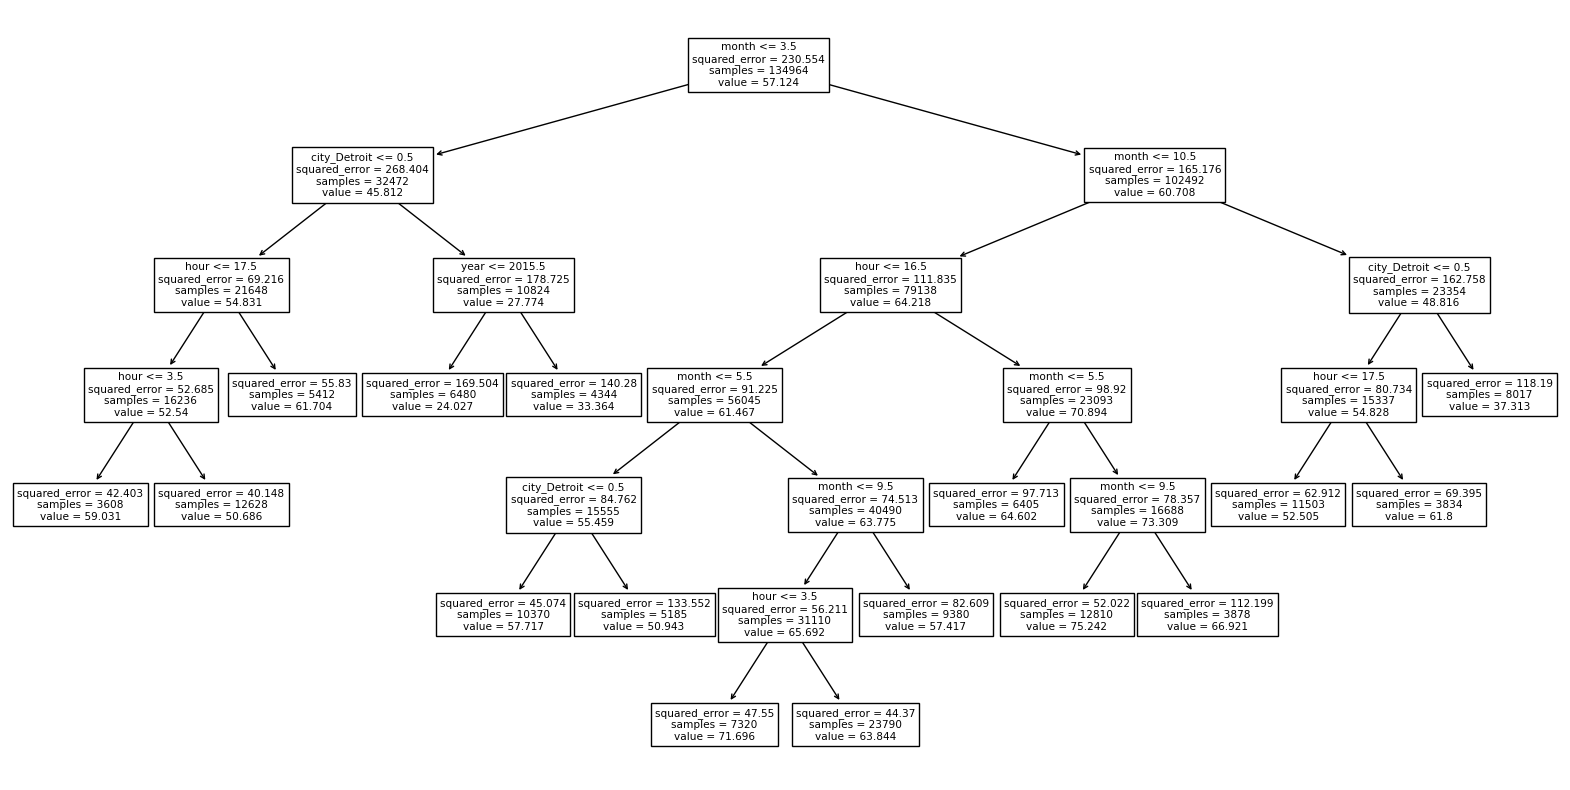

In [37]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(20,10))
_ = plot_tree(reg, 
                   feature_names=reg.feature_names_in_,
                   filled=False)

* How does the Altair chart change if you use a max depth of `14` instead of a max leaf nodes of `16`?  (Don't try to make the tree diagram in this case.)

This might sound similar, but it is extremely different.

In [38]:
reg = DecisionTreeRegressor(max_depth=14)

In [39]:
reg.fit(df[cols], df["temperature"])

DecisionTreeRegressor(max_depth=14)

In [40]:
df["pred"] = reg.predict(df[cols])

Here is the chart.  Recall how above the same predictions were made for San Diego and San Francisco (at least in the part of the chart we are plotting).  Here there are many different values plotted.

In [45]:
c_14 = alt.Chart(df[6400:7000]).mark_line().encode(
    x="datetime",
    y="pred",
    color="city",
    tooltip=["city", "temperature", "pred", "datetime", "hour"]
).properties(
    width=600
)

c_14

alt.Chart(...)

How do those values compare to the true values?  Look how similar they are!  Is that a good sign?  No, it is almost surely a sign of overfitting.  Using a depth of 14 in this case is providing too much flexibility to the model.

In [46]:
c_true + c_14

alt.LayerChart(...)

* How many leaf nodes are there in this case?  Use the method `get_n_leaves`.

In [42]:
reg.get_n_leaves()

12722

The theoretical maximum number of leaf nodes for a depth of 14 is $2^{14}$.

In [43]:
2**14

16384

* Do you think this new decision tree would do well at predicting unseen data?

No, I would expect poor performance on new data, because it is overfitting the input data.

* I don't think using `train_test_split` makes much sense on this data, do you see why?

Imagine we separate the data into a training set and a test set.  Maybe the training set includes the data from 7am (for a particular city and day) and the test set includes the data from 8am (for that same city and day).  In real life, the temperatures for 7am and 8am will be very similar, so we will probably get a very accurate prediction for the 8am value, but I do not think that is meaningful.  (Another way to think about it, is if we want to predict the temperature at some day in the future, we will not know what the temperature is one hour earlier.)  

In short, if 7am is in the training set, it's like we already knew the 8am value.

I believe a better way with this sort of data (this is called time series data): remove a whole month or a whole year, and see how we do on the predictions for that missing month or year.  That performance would be much more indicative of how we might hope to do on new predictions in the future.

We didn't get to the following.

## Extra time?

I doubt we will get here, but if we do, this will give a sense of how decision trees make their predictions.  (Not how they make their cuts.)

* Make a new decision tree regressor that allows only 4 leaf nodes.

* Draw the corresponding diagram using `plot_tree`.

* Can you recover the given value for one of the leaf nodes using Boolean indexing?